In [1]:
import numpy as np
from tensorflow.keras import layers,regularizers,models
import matplotlib.pyplot as plt
import os

In [2]:
def build_fc_model(input_shape=(181,1), num_class=8):
    
    
    model = models.Sequential([
                                    layers.Conv1D(128,3,input_shape=input_shape,activation='relu'),
                                    layers.MaxPool1D(2),
                                    layers.Dropout(0.2),
                                    
                                    layers.Conv1D(64,3,activation='relu'),
                                    layers.MaxPool1D(2),
                                    layers.Dropout(0.1),
                                    
                                    layers.Conv1D(64,3,activation='relu'),
                                    layers.MaxPool1D(2),
                                    layers.Dropout(0.2),
                                    
                                    layers.Conv1D(32,3,activation='relu'),
                                    layers.MaxPool1D(2),
                                    layers.Dropout(0.1),
                                    
                                    layers.Conv1D(32,3,activation='relu'),
                                    layers.MaxPool1D(2),
                                    layers.Dropout(0.2),

                                    layers.Flatten(),
                                    layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(2e-4)),
                                    # layers.Dropout(0.1),

                                    # layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(3e-8)),
                                    # layers.Dropout(0.1),

                                    # layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0e-4)),
                                    # layers.Dropout(0.1),

                                    # layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0e-4)),
                                    layers.Dense(num_class,activation='softmax')
                                    ])

    return model

In [3]:
def load_features(feature_path):
    x = []
    y = []
    for feature in os.listdir(feature_path):
        feat = np.loadtxt(feature_path+feature,delimiter=',')
        x.append(feat)
        label = feature[-7]
        y.append(int(label))
    x = np.array(x)
    y = np.array(y)
    h,w = x.shape
    x = x.reshape(h,w,1)
    h = y.shape[0]
    y = y.reshape(h,1)
    return (x,y)

# Loading features

In [4]:
x_train,y_train = load_features('features/train/')
x_test,y_test = load_features('features/test/')
print((x_train.shape,y_test.shape))

((1152, 143, 1), (288, 1))


# Training the model
The model classifies human voices in 8 different classes of emotions

**label**   **emotion**

0   =   neutral

1   =   calm

2   =   happy

3   =   sad

4   =   angry

5   =   fearful

6   =   disgust

7   =   surprised

In [6]:
model=build_fc_model(x_train[0].shape)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# csv_logger = CSVLogger('model_history.log', separator=',', append=False)
history=model.fit(x_train,y_train,epochs=1000,batch_size=256,validation_data=(x_test,y_test))
model.summary()

==============] - 0s 52ms/step - loss: 0.2289 - accuracy: 0.9297 - val_loss: 2.4767 - val_accuracy: 0.6632
Epoch 881/1000
5/5 [==============================] - 0s 53ms/step - loss: 0.2402 - accuracy: 0.9236 - val_loss: 2.6446 - val_accuracy: 0.6667
Epoch 882/1000
5/5 [==============================] - 0s 54ms/step - loss: 0.2446 - accuracy: 0.9236 - val_loss: 2.6608 - val_accuracy: 0.6528
Epoch 883/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.2519 - accuracy: 0.9271 - val_loss: 2.6155 - val_accuracy: 0.6562
Epoch 884/1000
5/5 [==============================] - 0s 50ms/step - loss: 0.2243 - accuracy: 0.9366 - val_loss: 2.5903 - val_accuracy: 0.6667
Epoch 885/1000
5/5 [==============================] - 0s 52ms/step - loss: 0.2623 - accuracy: 0.9141 - val_loss: 2.6781 - val_accuracy: 0.6597
Epoch 886/1000
5/5 [==============================] - 0s 57ms/step - loss: 0.2738 - accuracy: 0.9175 - val_loss: 2.6302 - val_accuracy: 0.6667
Epoch 887/1000
5/5 [===============

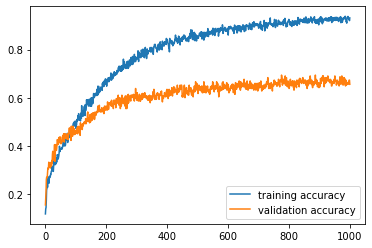

In [7]:
plt.plot(history.history['accuracy'],label = 'training accuracy')
# print(history.history.keys())
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()